# Understanding Urban Housing Trends: A Machine Learning Approach Pt.2

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats  
from statsmodels.stats.diagnostic import het_breuschpagan  
import statsmodels.api as sm  
from statsmodels.formula.api import ols 
from pandas.plotting import scatter_matrix  
from mpl_toolkits.mplot3d import Axes3D  
from scipy import stats  
from scipy.stats import t, f 
from matplotlib.patches import Ellipse 
import statsmodels.stats.diagnostic as diagnostic  
from statsmodels.stats.stattools import durbin_watson  
from statsmodels.graphics.regressionplots import influence_plot 
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import itertools  
from collections import OrderedDict  

## Loading and Exploring Dataset

In [2]:
# load dataset
data = pd.read_excel('../STAT4360/Real estate valuation data set.xlsx', index_col=0)
data.index.name = None
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# look at data information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
# Renaming columns for easier usage
data1 = data.rename(columns={
    'X1 transaction date': 'X1',
    'X2 house age': 'X2',
    'X3 distance to the nearest MRT station': 'X3',
    'X4 number of convenience stores': 'X4',
    'X5 latitude': 'X5',
    'X6 longitude': 'X6',
    'Y house price of unit area': 'y'
})
data1.head()

,X1,X2,X3,X4,X5,X6,y
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
X2 = data1['X2']
X3 = data1['X3']
X4 = data1['X4']
X5 = data1['X5']
y = data1['y']

In [6]:
# Last time we found outliers and found these were problematic so we are dropping them and not using x6 since we found it was not useful
data1 = data1.drop(index=[114, 127, 149, 221, 271, 313, 390])


## Building the WLS model

*Since we noticed last time that we had nonconstant error variance we are fitting a weighted least square model*

OLS Model Summary:
------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     212.8
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           7.65e-98
Time:                        16:48:16   Log-Likelihood:                -1376.5
No. Observations:                 407   AIC:                             2763.
Df Residuals:                     402   BIC:                             2783.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

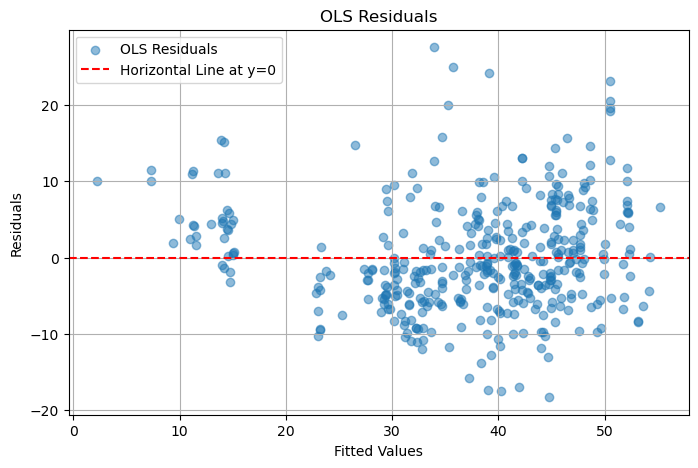

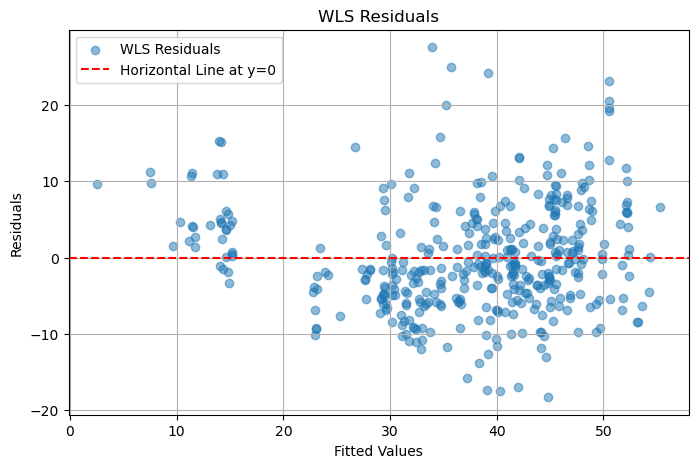

In [7]:
#FIT OLS MODEL
ols_model = ols('y~X2+X3+X4+X5',data=data1).fit()

print("OLS Model Summary:")
print('------------------------')
print(ols_model.summary())

#GET RESIDUALS OF MODEL
residuals = ols_model.resid

#CALCULATE WEIGHT
weights = 1/residuals**2

#WLS REGRESSION
y=data1["y"]
X = sm.add_constant(data1[['X2', 'X3', 'X4', 'X5']])
wls_model=sm.WLS(y, X, weights=weights).fit()

# Print WLS summary
print('WLS Model Summary:')
print('--------------------------')
print(wls_model.summary())

# Plot OLS residuals
plt.figure(figsize=(8, 5))
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5, label='OLS Residuals')
plt.axhline(y=0.0, color='r', linestyle='--', label='Horizontal Line at y=0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('OLS Residuals')
plt.grid(True)
plt.legend()
plt.show()

# Plot WLS residuals
plt.figure(figsize=(8, 5))
plt.scatter(wls_model.fittedvalues, wls_model.resid, alpha=0.5, label='WLS Residuals')
plt.axhline(y=0.0, color='r', linestyle='--', label='Horizontal Line at y=0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('WLS Residuals')
plt.grid(True)
plt.legend()
plt.show()

## Model Checking

**Checking for normality of residuals and constant variance**

In [8]:
#obtain WLS residual
wls_residuals = wls_model.resid

X = wls_model.model.exog 

Shapiro-Wilk Test:
Statistic: 0.9762961864471436
p-value: 3.3373628411936807e-06

Kolmogorov-Smirnov Test:
Statistic: 0.4128726478339065
p-value: 2.6966834120426983e-63


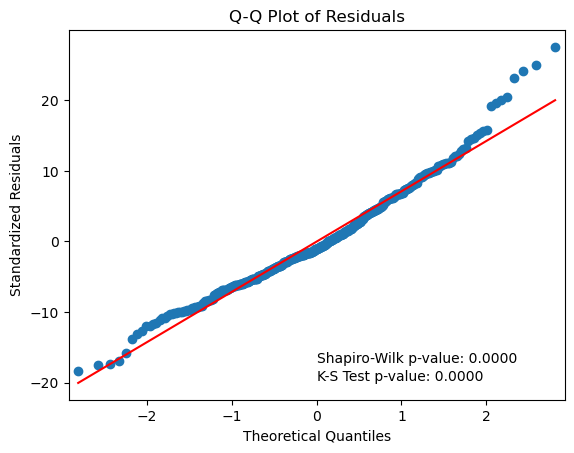

In [9]:
# test nomrality and Q-Q plot

# Perform Shapiro-Wilk test and Kolmogorov-Smirnov test
# s-w test is good for small sample
# k-s test is good for big sample

shapiro_wilk_test = stats.shapiro(wls_residuals)
statistic, p_value = shapiro_wilk_test
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

ks_test = stats.kstest(wls_residuals, 'norm')
print("\nKolmogorov-Smirnov Test:")
print("Statistic:", ks_test.statistic)
print("p-value:", ks_test.pvalue)


# Q-Q plot of residuals to check for normality (quantile-quantile)
sm.qqplot(wls_residuals, line='s')  
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Q-Q Plot of Residuals')

# (0.5,0.1) means coordinates n the normalized axis units (0 to 1)
plt.text(0.5, 0.1, f'Shapiro-Wilk p-value: {p_value:.4f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.05, f'K-S Test p-value: {ks_test.pvalue:.4f}', transform=plt.gca().transAxes)

plt.show()

*Using The Shapiro-Wilk test to assess the normality of residuals we can see that the p-value is extremely small which tells us that the assumption of normality does not hold.*

In [10]:
bp_test = diagnostic.het_breuschpagan(wls_residuals, X)

bp_statistic, bp_p_value = bp_test[0], bp_test[1]

print(f'Breusch-Pagan Test Statistic: {bp_statistic}')
print(f'P-value: {bp_p_value}')

Breusch-Pagan Test Statistic: 4.069937233244753
P-value: 0.3966236103980063


*Using The Breusch-Pagan test to check for constant variance we obtain a p-value larger than .05 meaning that there is no significant evidence of non-constant variance. So we can conclude that the residuals are constant variance.*

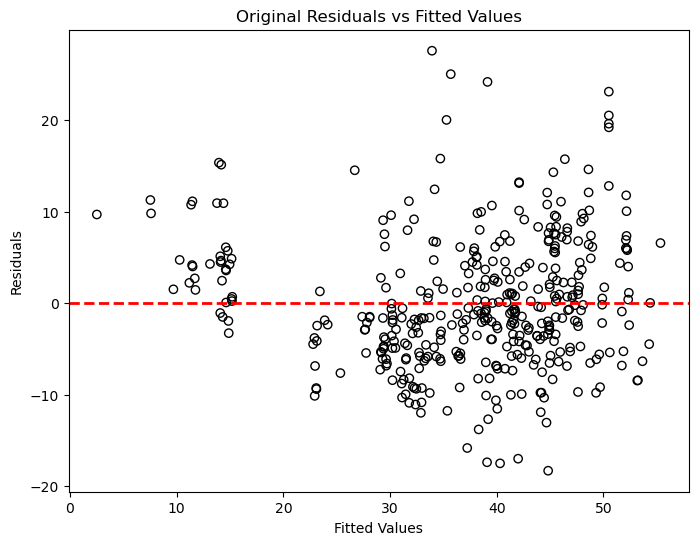

In [11]:
fitted_values = wls_model.fittedvalues 

residuals = data1['y'] - fitted_values

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, edgecolors='k', facecolors='none')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # line y=0 as refresernce
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Original Residuals vs Fitted Values')
plt.show()


# From Data to Decisions: Selecting the Best Regression Model for Annual Income

## Loading and Exploring Dataset

In [12]:
df = pd.read_csv('../STAT4360/test2_data.csv')
df.head()

,Annual_Income,Education_Level,Work_Experience,Job_Satisfaction,Hours_Worked_Per_Week,Age
0,988.946586,0,9.422917,55.677880,52.866799,40.0
1,1020.041367,1,10.904642,83.578660,40.296092,49.0
2,975.624678,0,9.895865,76.015385,40.069646,43.0
3,962.954920,0,6.493966,88.615920,39.879375,44.0
4,1024.607427,0,13.428468,76.008175,40.990424,45.0


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Annual_Income          300 non-null    float64
 1   Education_Level        300 non-null    int64  
 2   Work_Experience        300 non-null    float64
 3   Job_Satisfaction       300 non-null    float64
 4   Hours_Worked_Per_Week  300 non-null    float64
 5   Age                    300 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


,Annual_Income,Education_Level,Work_Experience,Job_Satisfaction,Hours_Worked_Per_Week,Age
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,964.806506,0.496667,10.161068,73.912309,40.404819,41.24000
std,105.288390,0.500824,2.896402,13.997872,4.831309,8.16525
min,700.343850,0.000000,0.276198,50.231601,26.745151,17.00000
25%,887.379639,0.000000,7.950262,61.404488,37.200960,36.00000
50%,963.130518,0.000000,10.236518,73.130363,40.353756,41.00000
75%,1040.868260,1.000000,11.999492,85.751066,43.407992,47.00000
max,1222.783889,1.000000,21.558194,99.498012,53.161910,61.00000


In [14]:
# Renaming columns for easier usage
df1 = df.rename(columns={
    'Annual_Income': 'y',
    'Education_Level': 'X1', 
    'Work_Experience' : 'X2', 
    'Job_Satisfaction' : 'X3', 
    'Hours_Worked_Per_Week' : 'X4', 
    'Age' : 'X5'})
df1.head()

,y,X1,X2,X3,X4,X5
0,988.946586,0,9.422917,55.677880,52.866799,40.0
1,1020.041367,1,10.904642,83.578660,40.296092,49.0
2,975.624678,0,9.895865,76.015385,40.069646,43.0
3,962.954920,0,6.493966,88.615920,39.879375,44.0
4,1024.607427,0,13.428468,76.008175,40.990424,45.0


## Exploratory Data Analysis

C:\Users\naujv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


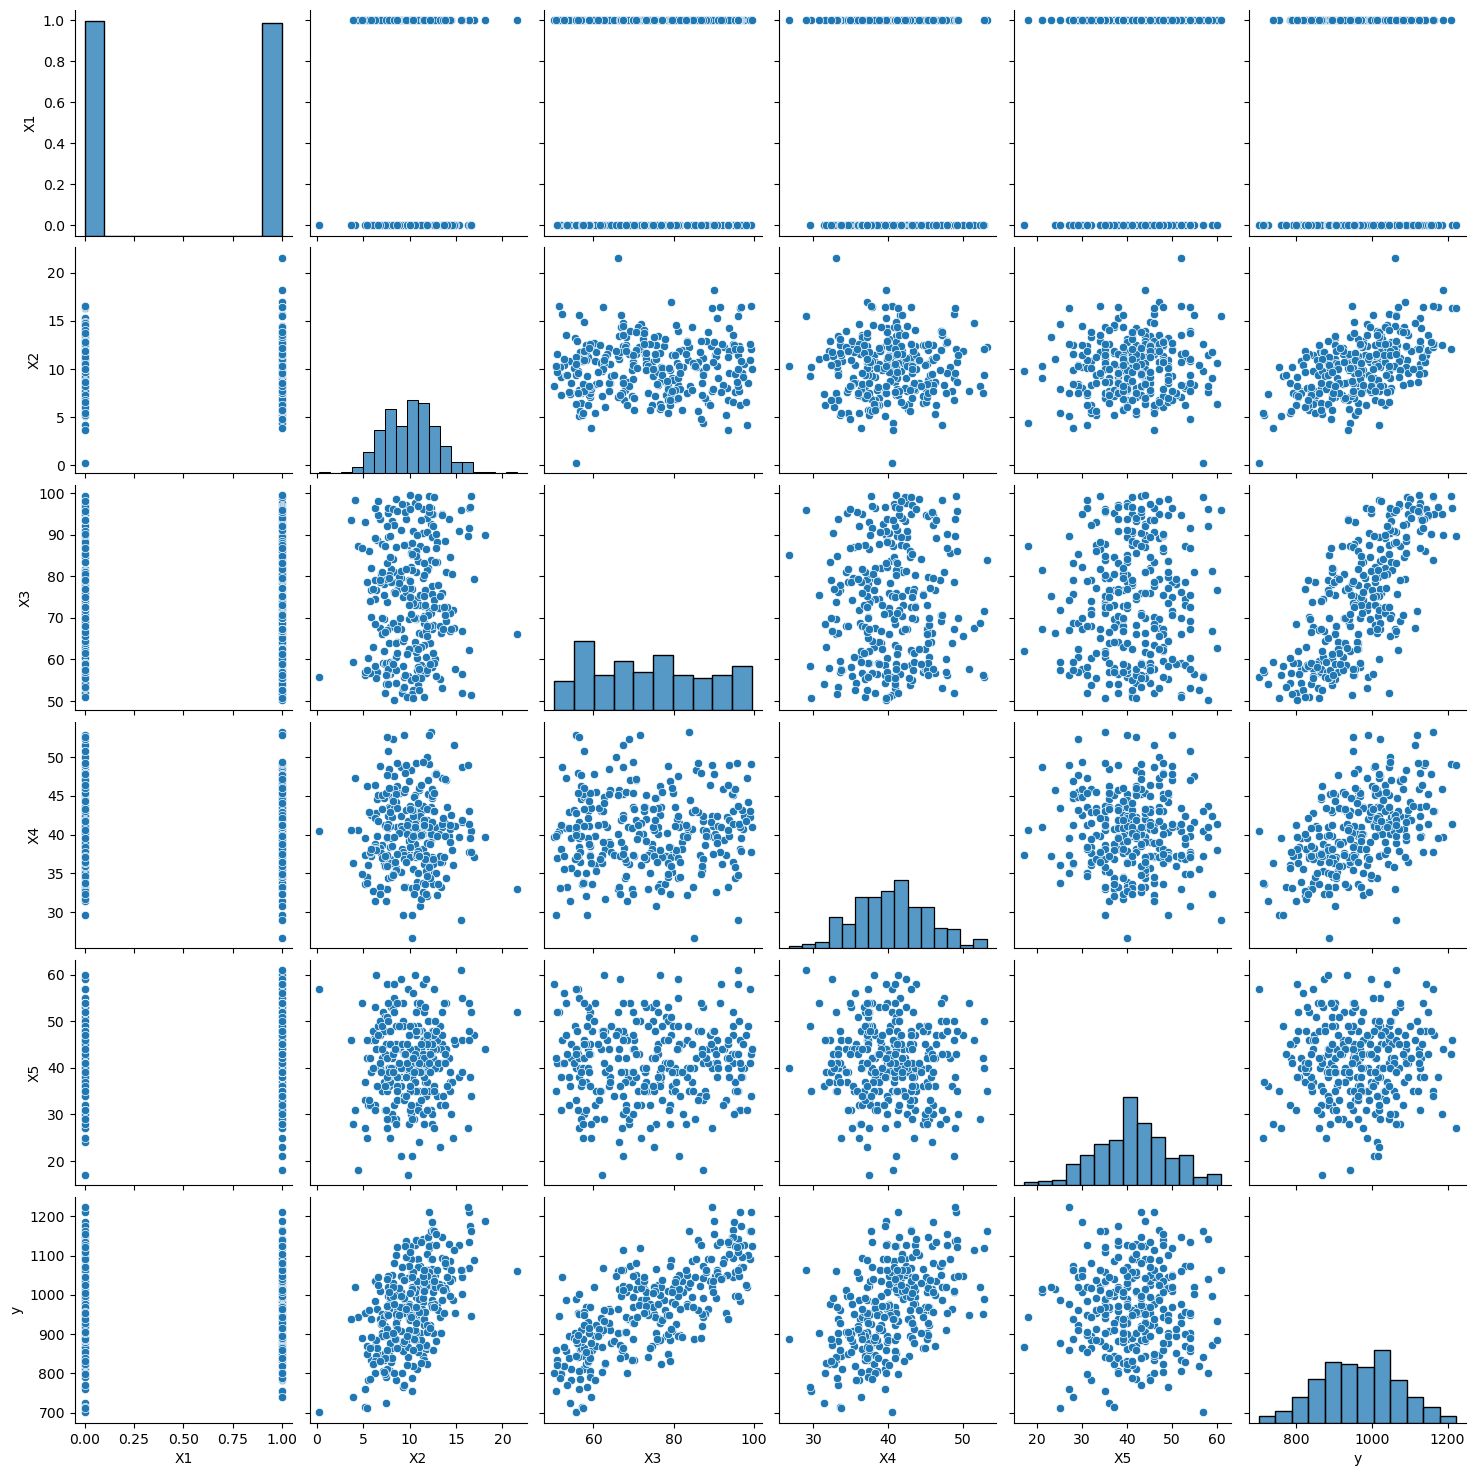

In [15]:
sns.pairplot(df1, vars=['X1','X2','X3','X4','X5','y'])
plt.show()

*Before even doing any analysis, we can see that the X5 variable has the weakest linear relationship with y, possibly telling us that it is not significant*

## Building the Initial Regression Model

In [16]:
full_model = ols('y~X1+X2+X3+X4+X5', data = df1).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6462.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          3.36e-298
Time:                        16:48:24   Log-Likelihood:                -1115.9
No. Observations:                 300   AIC:                             2244.
Df Residuals:                     294   BIC:                             2266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0936      6.730      0.311      0.7

## Looking for the best model using backwards regression

**Best two variable model**

In [17]:
X = df1[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df1['y']

lr = LinearRegression()

# Backward selection for 2 variables
sfs_2 = SFS(lr, 
          k_features=2, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error', 
          cv=0)

sfs_2_variables = sfs_2.fit(X, y)
selected_features_2 = sfs_2.k_feature_names_
print(f'Selected features: {selected_features_2}')

Selected features: ('X2', 'X3')


In [18]:
sfs_2.subsets_

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([-99.63444951]),
  'avg_score': -99.63444951043563,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-99.7501759]),
  'avg_score': -99.75017589892188,
  'feature_names': ('X1', 'X2', 'X3', 'X4')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([-149.560755]),
  'avg_score': -149.56075499861592,
  'feature_names': ('X2', 'X3', 'X4')},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([-2437.22337646]),
  'avg_score': -2437.2233764628245,
  'feature_names': ('X2', 'X3')}}

In [19]:
X_2 = df1[['X2','X3']]
X_2 = sm.add_constant(X_2)
two_var_model = sm.OLS(y, X_2).fit()

print(two_var_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           3.33e-98
Time:                        16:48:24   Log-Likelihood:                -1595.5
No. Observations:                 300   AIC:                             3197.
Df Residuals:                     297   BIC:                             3208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.0937     17.827     22.218      0.0

**Best 3 variable model**

In [20]:
# Backward selection for 3 variables
sfs_3 = SFS(lr, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error', 
          cv=0)

sfs_3_variables = sfs_3.fit(X, y)
selected_features_3 = sfs_3.k_feature_names_
print(f'Selected features: {selected_features_3}')

Selected features: ('X2', 'X3', 'X4')


In [21]:
sfs_3.subsets_

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([-99.63444951]),
  'avg_score': -99.63444951043563,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-99.7501759]),
  'avg_score': -99.75017589892188,
  'feature_names': ('X1', 'X2', 'X3', 'X4')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([-149.560755]),
  'avg_score': -149.56075499861592,
  'feature_names': ('X2', 'X3', 'X4')}}

In [22]:
X_3 = df1[['X2','X3','X4']]
X_3 = sm.add_constant(X_3)
three_var_model = sm.OLS(y, X_3).fit()

print(three_var_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7190.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          3.97e-276
Time:                        16:48:24   Log-Likelihood:                -1176.8
No. Observations:                 300   AIC:                             2362.
Df Residuals:                     296   BIC:                             2376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0741      7.209      1.814      0.0

**Best 4 variable model**

In [23]:
# Backward selection example for 4 variables
sfs_4 = SFS(lr, 
          k_features=4, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error', 
          cv=0)

sfs_4_variables = sfs_4.fit(X, y)
selected_features_4 = sfs_4.k_feature_names_
print(f'Selected features: {selected_features_4}')

Selected features: ('X1', 'X2', 'X3', 'X4')


In [24]:
sfs_4.subsets_

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([-99.63444951]),
  'avg_score': -99.63444951043563,
  'feature_names': ('X1', 'X2', 'X3', 'X4', 'X5')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-99.7501759]),
  'avg_score': -99.75017589892188,
  'feature_names': ('X1', 'X2', 'X3', 'X4')}}

In [25]:
X_4 = df1[['X1','X2','X3','X4']]
X_4 = sm.add_constant(X_4)
four_var_model = sm.OLS(y, X_4).fit()

print(four_var_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     8095.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          4.16e-300
Time:                        16:48:24   Log-Likelihood:                -1116.1
No. Observations:                 300   AIC:                             2242.
Df Residuals:                     295   BIC:                             2261.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3088      5.991      0.052      0.9

*We can see that the age is not significant because when looking at the original OLS model variable x5 had a p-value larger than .05 meaning that it is not statistically significant to the model*

## Comparing all the "best" models

In [26]:
# Define the mean squared error function for full model (sigma^2)
# this is for calculation of cp values

full_model=sm.OLS(df1['y'], sm.add_constant(df1[['X1','X2','X3','X4','X5']])).fit()
mse=(np.sum(full_model.resid**2))/(len(df1['y'])-len(full_model.params))


# Define the function to calculate various model metrics
def model_metrics(model, y_true):
    """
    Calculate metrics for the given model.
    :param model: Fitted statsmodels OLS model object.
    :param y_true: Array-like, true values of the response variable.
    :return: Dictionary with calculated metrics.
    """
    # Get fitted values and residuals
    y_pred = model.fittedvalues
    residuals = y_true - y_pred

    # Calculate Mean Squared Error and Root Mean Squared Error
    #mse_value = mse(residuals)
    rmse_value = np.sqrt(np.sum(residuals**2))
    
    # Calculate Residual Sum of Squares
    rss = np.sum(residuals**2)
    
    # Number of observations and predictors
    n = len(y_true)
    k = len(model.params) - 1  # Number of predictors (excluding the intercept)

    # Calculate metrics
    r_squared = model.rsquared  # R-Squared
    adjusted_r_squared = model.rsquared_adj  # Adjusted R-Squared
    aic = model.aic  # Akaike Information Criterion
    bic = model.bic  # Bayesian Information Criterion
    mallow_cp = (rss / mse) - n +2*(k + 1)  # Mallow's Cp。we got mse from full model.
    ######################################################################
    # get press
    influence=model.get_influence()
    hat_matrix=influence.hat_matrix_diag   # leverage value (diagonal elements)
    press_residuals=residuals/(1-hat_matrix)
    press=np.sum(press_residuals**2)
     # Prediction Sum of Squares (PRESS)
  #########################################################
    return {
        'R-Squared': r_squared,
        'Adjusted R-Squared': adjusted_r_squared,
        'AIC': aic,
        'BIC': bic,
        'SSE': rss,
        'RMSE': rmse_value,
        "Mallow's Cp": mallow_cp,
        'PRESS': press
    }

# Define the function to run all possible models
def run_all_models(data, response):
    """
    Run all possible models and collect metrics for each.
    :param data: DataFrame containing the response and predictor variables.
    :param response: String, name of the response variable.
    :return: DataFrame with metrics for each model.
    """
    # Extract feature names
    features = list(data.columns)
    features.remove(response)  # Remove the response variable from the features list
    
    all_metrics = []  # List to store metrics for all models

    all_coefficients = []  # List to store coefficients for all models
    
    # Generate all combinations of features
    for i in range(1, len(features) + 1):
        for feature_subset in itertools.combinations(features, i):
            temp_features = list(feature_subset)  # Current set of features
            model_formula = f"{response} ~ {' + '.join(temp_features)}"  # Model formula
            
            # Fit the model
            model = sm.OLS(data[response], sm.add_constant(data[temp_features])).fit()
            
            # Calculate metrics for the model
            metrics = model_metrics(model, data[response])
            
            # Append metrics to the list
            all_metrics.append({
                'Features': ', '.join(temp_features),  # Feature names for the model
                'R-Squared': metrics['R-Squared'],
                'Adjusted R-Squared': metrics['Adjusted R-Squared'],
                'AIC': metrics['AIC'],
                'BIC': metrics['BIC'],
                'SSE': metrics['SSE'],
                'RMSE': metrics['RMSE'],
                "Mallow's Cp": metrics["Mallow's Cp"],
                'PRESS': metrics['PRESS']
            })
            # Append coefficients to the list for printing coefficients
            
            # Extract coefficients and ensure 'Features' is the first column
            coefficients = model.params.to_dict()
            ordered_coefficients = OrderedDict([('Features', ', '.join(temp_features))])
            ordered_coefficients.update(coefficients)
            all_coefficients.append(ordered_coefficients)
    
    # Convert the list of metrics into a DataFrame for easy viewing
    metrics_df = pd.DataFrame(all_metrics)

    # Convert the list of coefficients into a DataFrame for easy viewing
    coefficients_df = pd.DataFrame(all_coefficients)
    
    return metrics_df, coefficients_df



response = 'y'  # Specify the response variable
# Run all possible models and collect metrics
metrics_df,coefficients_df = run_all_models(df1, response)
# Print the DataFrame with all metrics
#metrics_df

In [27]:
selected_features = ['X2, X3', 'X2, X3, X4', 'X1, X2, X3, X4']

selected_models = metrics_df[metrics_df['Features'].isin(selected_features)]

selected_models

,Features,R-Squared,Adjusted R-Squared,AIC,BIC,SSE,RMSE,Mallow's Cp,PRESS
9,"X2, X3",0.779411,0.777925,3196.947533,3208.058880,731167.012939,855.083044,6897.726117,745457.913593
21,"X2, X3, X4",0.986463,0.986326,2361.673929,2376.489059,44868.226500,211.821214,149.321874,46077.174592
25,"X1, X2, X3, X4",0.990972,0.990849,2242.163766,2260.682678,29925.052770,172.988591,4.341484,30942.110942


*The model that demonstrates better predictive capabilities is the four-variable model. We can see that the metrics of the four-variable model is the best among all of them. For example, AIC/BIC is the smallest amongst all, etc. Especially Mallow’s Cp which should be close to 5 for the four-variable model and is 4.341.*

**ANOVA table for best model**

In [28]:
y_pred = four_var_model.fittedvalues
residuals = y - y_pred

# Calculate SST, SSR, SSE
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SSE = np.sum(residuals**2)

# Degrees of Freedom
df_reg = len(four_var_model.params) - 1  # Number of predictors, excluding the intercept
df_resid = len(y) - len(four_var_model.params)  # Observations minus number of parameters
df_total = len(y) - 1  # Total observations minus 1

# Mean Squares
MSR = SSR / df_reg
MSE = SSE / df_resid

# F-statistic
F = MSR / MSE

# p-value for the F-statistic
p_value = stats.f.sf(F, df_reg, df_resid)

# Create the ANOVA table
anova_table = pd.DataFrame({
    'Source': ['Regression', 'Residual', 'Total'],
    'SS': [SSR, SSE, SST],
    'DF': [df_reg, df_resid, df_total],
    'MS': [MSR, MSE, np.nan],
    'F': [F, np.nan, np.nan],
    'p-value': [p_value, np.nan, np.nan]
})

# Display the ANOVA table
print(anova_table)

       Source            SS   DF             MS            F        p-value
0  Regression  3.284683e+06    4  821170.709102  8095.068739  4.161235e-300
1    Residual  2.992505e+04  295     101.440857          NaN            NaN
2       Total  3.314608e+06  299            NaN          NaN            NaN


*Checking for the results of the global test the p-value is 4.161235e-300 we can see that at least one of the variables is statistically significant in predicting y.*

## Model Checking for the best model

In [29]:
# Fit model
X_4 = df1[['X1', 'X2', 'X3', 'X4']]
X_4 = sm.add_constant(X_4)
four_var_model = sm.OLS(y, X_4).fit()

# Get residuals
residuals = four_var_model.resid
fitted_values = four_var_model.fittedvalues

**Normality Checking**

In [30]:
shapiro_wilk_test = stats.shapiro(residuals)
statistic, p_value = shapiro_wilk_test
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

ks_test = stats.kstest(residuals, 'norm')
print("\nKolmogorov-Smirnov Test:")
print("Statistic:", ks_test.statistic)
print("p-value:", ks_test.pvalue)

Shapiro-Wilk Test:
Statistic: 0.9976838231086731
p-value: 0.9513391852378845

Kolmogorov-Smirnov Test:
Statistic: 0.4020903121077868
p-value: 2.64720713175503e-44


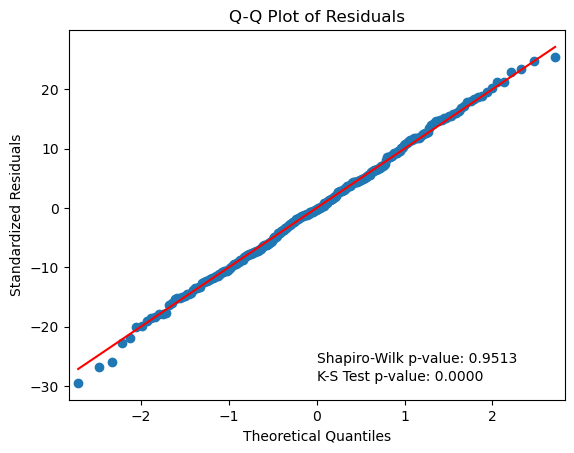

In [31]:
sm.qqplot(residuals, line='s')  
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Q-Q Plot of Residuals')

plt.text(0.5, 0.1, f'Shapiro-Wilk p-value: {p_value:.4f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.05, f'K-S Test p-value: {ks_test.pvalue:.4f}', transform=plt.gca().transAxes)

plt.show()

*Using the Shapiro-Wilk Test we obtain a p-value of .9513 which tells us that they are approximately normally distributed. We can also see that in the Q-Q plot*

**Constant Varaince**

In [32]:
X = four_var_model.model.exog

bp_test = diagnostic.het_breuschpagan(residuals, X)

bp_statistic, bp_p_value = bp_test[0], bp_test[1]

print(f'Breusch-Pagan Test Statistic: {bp_statistic}')
print(f'P-value: {bp_p_value}')

Breusch-Pagan Test Statistic: 6.370745078099049
P-value: 0.17311886813615976


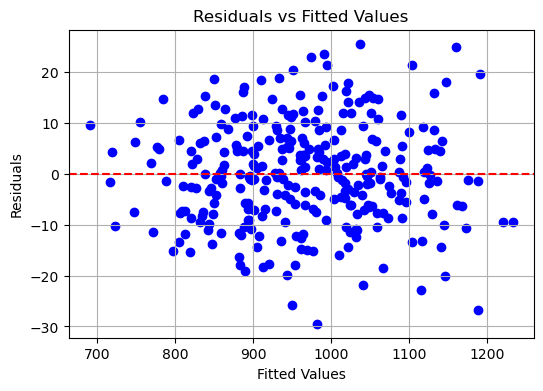

In [33]:
plt.figure(figsize=(6, 4))  
plt.scatter(fitted_values, residuals, color='blue')  
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel('Fitted Values') 
plt.ylabel('Residuals')  
plt.title('Residuals vs Fitted Values')  
plt.grid(True) 
plt.show()

*Using the Breusch-Pagan test we obtain a p-value of .1731 which tells us that the residuals have constant variance. We can also see that in our Residuals vs Fitted values graph*

In [34]:
# Perform Breusch-Godfrey test for up to 4 lags
bg_test = diagnostic.acorr_breusch_godfrey(four_var_model, nlags=4)

# bg_test returns a tuple: (Lagrange multiplier test statistic, p-value, F-statistic, F p-value)
print(f'LM Statistic: {bg_test[0]}')
print(f'p-value: {bg_test[1]}')

LM Statistic: 6.1975447761839275
p-value: 0.18487324021958687


*Using the Breusch-Godfrey test we check for if the residual is independent. We obtain a p-value of .1849 which tells us that there is no significant evidence of autocorrelation*

**Checking for Outliers or Influential Points**

In [35]:
influence = four_var_model.get_influence()

 # Get Mean Squared Error directly
mse = four_var_model.mse_resid

# Calculate various residuals
standardized_residuals = residuals /np.sqrt(mse)

# Calculate studentized residuals: residuals adjusted for leverage
studentized_residuals = influence.resid_studentized_internal

# Calculate PRESS residuals
hat_matrix_diag = influence.hat_matrix_diag  # Leverage values
press_residuals = residuals / (1 - hat_matrix_diag)

# Calculate R-student residuals: external studentized residuals, accounting for leverage
r_student_residuals = influence.resid_studentized_external

# Calculate leverage values (hii)
leverage_values = influence.hat_matrix_diag

# Calculate standardized PRESS residuals
# Standardized PRESS residuals are the PRESS residuals divided by sqrt(sigma^2(1-h_ii))
# when sigma^2 is estimated by mse; it is equal to studentized

standardized_press_residuals = residuals / np.sqrt(mse * (1 - leverage_values))

# Create a DataFrame with the residuals and leverage values
results_df = pd.DataFrame({
    'Observed': df1['y'],
    'Fitted': fitted_values,
    'Residual': residuals,
    'Standardized Residual': standardized_residuals,
    'Studentized Residual': studentized_residuals,
    'PRESS Residual': press_residuals,
    'PRESS residual square': press_residuals**2,
    'R-Student Residual': r_student_residuals,
    'standardized PRESS_resi.':standardized_press_residuals,
    'Leverage (hii)': leverage_values
    
})

# Display the DataFrame
results_df.head()


,Observed,Fitted,Residual,Standardized Residual,Studentized Residual,PRESS Residual,PRESS residual square,R-Student Residual,standardized PRESS_resi.,Leverage (hii)
0,988.946586,978.689116,10.257470,1.018436,1.036806,10.630844,113.014847,1.036938,1.036806,0.035122
1,1020.041367,1032.467759,-12.426392,-1.233782,-1.239112,-12.533975,157.100539,-1.240242,-1.239112,0.008583
2,975.624678,960.166899,15.457779,1.534761,1.540012,15.563742,242.230078,1.543617,1.540012,0.006808
3,962.954920,960.348623,2.606297,0.258772,0.260947,2.650288,7.024027,0.260534,0.260947,0.016599
4,1024.607427,1032.613404,-8.005977,-0.794892,-0.799189,-8.092779,65.493072,-0.798699,-0.799189,0.010726


In [36]:
# checking possible outliers

# Columns to check
columns_to_check = ['Residual','Standardized Residual', 'Studentized Residual','R-Student Residual']

# Iterate over each column
for column in columns_to_check:
    print(f"Results for {column}:")
    # Find the absolute values greater than 3
    condition = results_df[column].abs() > 3
    
    # Get the indices where the condition is True
    indices = results_df.index[condition]
    
    # Check if there are any results
    if indices.empty:
        print(f"No values in {column} with absolute value greater than 3.")
    else:
        # Print the index and column name if condition is met
        for idx in indices:
            print(f"  Index: {idx}, Value: {results_df.loc[idx, column]}")
    print()  # Newline for separation between columns



Results for Residual:
  Index: 0, Value: 10.257470183599366
  Index: 1, Value: -12.426391823821064
  Index: 2, Value: 15.457779012368178
  Index: 4, Value: -8.005977229374821
  Index: 6, Value: 4.724195761357805
  Index: 8, Value: 4.601313442869468
  Index: 9, Value: -9.92264386001466
  Index: 11, Value: -14.789519568130913
  Index: 13, Value: -10.850863555087813
  Index: 14, Value: -7.035799165331923
  Index: 15, Value: 10.642230582271964
  Index: 16, Value: 9.661551121235561
  Index: 17, Value: 6.1928662978410784
  Index: 18, Value: -11.592048893121955
  Index: 19, Value: -4.169969656833018
  Index: 20, Value: 11.787622694109018
  Index: 22, Value: 22.856662585100935
  Index: 25, Value: -4.19755616720181
  Index: 28, Value: 6.335596757559415
  Index: 29, Value: 9.111996466356686
  Index: 30, Value: -8.74569270535767
  Index: 31, Value: -14.479350577387095
  Index: 32, Value: -19.09936265492945
  Index: 33, Value: 4.33271498671354
  Index: 34, Value: -11.484326939537937
  Index: 35, V

*Based on the studentized residuals, R-student residual, and standardzied residuals, there are no possible outliers.*

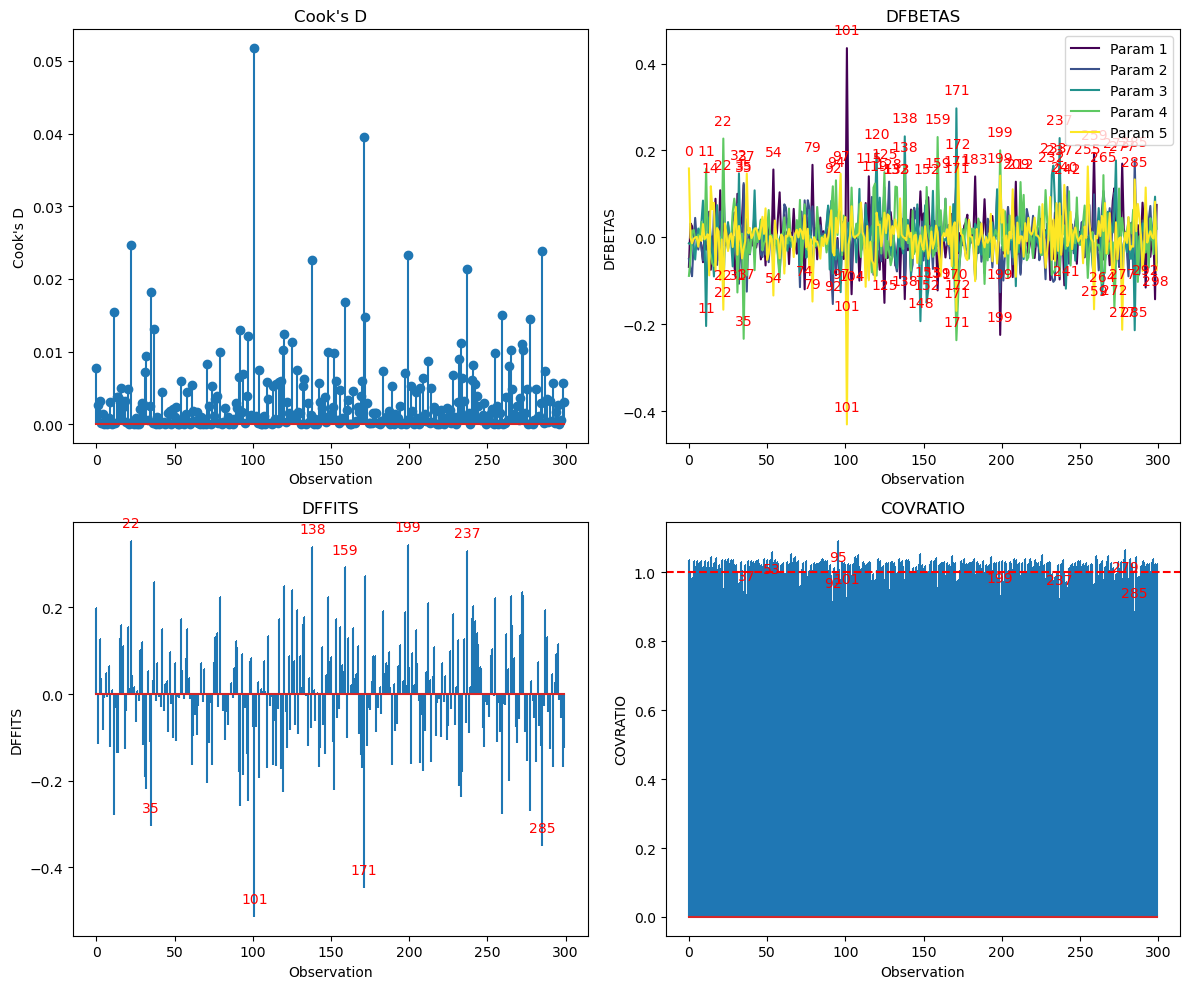

Possible influence points (Cook's D): []
Possible influence points (DFBETAS): [array([ 35,  54,  74,  79, 101, 104, 115, 125, 138, 159, 171, 183, 199,
       209, 259, 277, 292, 298], dtype=int64), array([ 22,  35,  37,  92, 101, 128, 159, 171, 199, 237, 242, 277, 285],
      dtype=int64), array([ 11,  22,  32,  97, 120, 138, 148, 152, 153, 170, 171, 232, 233,
       237, 241, 264, 273, 285], dtype=int64), array([ 11,  22,  31,  35,  92,  94, 119, 125, 132, 133, 138, 152, 159,
       171, 172, 199, 212, 265, 272], dtype=int64), array([  0,  14,  22,  37,  54,  79,  97, 101, 171, 172, 199, 240, 255,
       259, 277, 285], dtype=int64)]
Possible influence points (DFFITS): [ 22  35 101 138 159 171 199 237 285]
Possible influence points (COVRATIO): [ 37  92 101 199 237 285  53  95 279]
Common influence points (DFBETAS and DFFITS): {35, 101, 199, 138, 171, 237, 22, 285, 159}
Common influence points (Cook's D and DFFITS): set()
Common influence points (Cook's D, DFBETAS, DFFITS, and COVRATIO

In [37]:
# Calculate influence metrics
cooks_d = influence.cooks_distance[0]
dfbetas = influence.dfbetas
dffits = influence.dffits[0]
covratio = influence.cov_ratio

# Set up the plots
plt.figure(figsize=(12, 10))

# Cook's D Plot
plt.subplot(2, 2, 1)
plt.stem(cooks_d, markerfmt="o")
plt.title("Cook's D")
plt.xlabel('Observation')
plt.ylabel("Cook's D")

# Influence points identification for Cook's D
threshold_cooks_d = 1  # threshold
outliers_cooks_d = np.where(cooks_d > threshold_cooks_d)[0]
for i in outliers_cooks_d:
    plt.annotate(f'{i}', (i, cooks_d[i]), textcoords="offset points", xytext=(0, 8), ha='center', color='red')

# DFBETAS Plot
plt.subplot(2, 2, 2)
num_params = dfbetas.shape[1]
colors = plt.cm.viridis(np.linspace(0, 1, num_params))
labels = [f'Param {i+1}' for i in range(num_params)]

for i in range(num_params):
    plt.plot(dfbetas[:, i], color=colors[i], label=labels[i])
    threshold_dfbetas = 2 / np.sqrt(len(df1['y']))  # threshold
    outliers_dfbetas = np.where(np.abs(dfbetas[:, i]) > threshold_dfbetas)[0]
    for j in outliers_dfbetas:
        plt.annotate(f'{j}', (j, dfbetas[j, i]), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

plt.title('DFBETAS')
plt.xlabel('Observation')
plt.ylabel('DFBETAS')
plt.legend(loc='best')

# DFFITS Plot
plt.subplot(2, 2, 3)
plt.stem(dffits, markerfmt=",")
plt.title('DFFITS')
plt.xlabel('Observation')
plt.ylabel('DFFITS')

threshold_dffits = 2 * np.sqrt((len(full_model.params)) / len(df1['y']))  # threshold
outliers_dffits = np.where(np.abs(dffits) > threshold_dffits)[0]
for i in outliers_dffits:
    plt.annotate(f'{i}', (i, dffits[i]), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# COVRATIO Plot
plt.subplot(2, 2, 4)
plt.stem(covratio, markerfmt=",")
plt.axhline(y=1, color='r', linestyle='--')
plt.title('COVRATIO')
plt.xlabel('Observation')
plt.ylabel('COVRATIO')

threshold_lower = 1 - 3 * ((len(full_model.params)) / len(df1['y']))  # lower threshold
threshold_upper = 1 + 3 * ((len(full_model.params)) / len(df1['y']))  # upper threshold

outliers_covratio_lower = np.where(covratio < threshold_lower)[0]
for i in outliers_covratio_lower:
    plt.annotate(f'{i}', (i, covratio[i]), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

outliers_covratio_upper = np.where(covratio > threshold_upper)[0]
for i in outliers_covratio_upper:
    plt.annotate(f'{i}', (i, covratio[i]), textcoords="offset points", xytext=(0, -15), ha='center', color='red')

# Adjust subplot layout
plt.tight_layout()
plt.show()

# Output influence points information
print("Possible influence points (Cook's D):", outliers_cooks_d)
possible_influence_points_dfbetas = [np.where(np.abs(dfbetas[:, i]) > threshold_dfbetas)[0] for i in range(num_params)]
print("Possible influence points (DFBETAS):", possible_influence_points_dfbetas)
print("Possible influence points (DFFITS):", outliers_dffits)
print("Possible influence points (COVRATIO):", np.concatenate([outliers_covratio_lower, outliers_covratio_upper]))

# Find common influence points
common_outliers_dfbetas = set()
for i in range(num_params):
    common_outliers_dfbetas.update(np.where(np.abs(dfbetas[:, i]) > threshold_dfbetas)[0])
common_outliers_dffits = set(outliers_dffits)

# Identify common influence points
common_influence_points = common_outliers_dfbetas.intersection(common_outliers_dffits)

# Include Cook's D in common influence points
common_influence_points_cooks_d_dffits = common_influence_points.intersection(set(outliers_cooks_d))

# Include COVRATIO in common influence points
common_influence_points_all = common_influence_points_cooks_d_dffits.intersection(set(np.concatenate([outliers_covratio_lower, outliers_covratio_upper])))

# Find common influence points for DFBETAS, DFFITS, and COVRATIO
common_influence_points_dfbetas_dffits_covratio = common_outliers_dfbetas.intersection(common_outliers_dffits).intersection(set(np.concatenate([outliers_covratio_lower, outliers_covratio_upper])))

# Print common influence points
print("Common influence points (DFBETAS and DFFITS):", common_influence_points)
print("Common influence points (Cook's D and DFFITS):", common_influence_points_cooks_d_dffits)
print("Common influence points (Cook's D, DFBETAS, DFFITS, and COVRATIO):", common_influence_points_all)
print("Common influence points (DFBETAS, DFFITS, and COVRATIO):", common_influence_points_dfbetas_dffits_covratio)


*It appears that there is no any special influential points*

## Hypothesis Testing

In [38]:
#Test null hypothesis: h0: b2=4b3
X_4 = df1[['X1', 'X2', 'X3', 'X4']]
X_4 = sm.add_constant(X_4)
four_var_model = sm.OLS(y, X_4).fit()

T = [[0, 0, 1, -4, 0]]
C = [0]

f_test_result = four_var_model.f_test((T,C))

print(f_test_result)

<F test: F=59.604189366782755, p=1.813269370717298e-13, df_denom=295, df_num=1>


*Since p-value is less than .05 we can reject the null hypothesis*